In [2]:
pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 11.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np
import os

# Load the image
image = cv2.imread("/Users/ashutosh/ProjectMajor/BASIC GEOMETRY/SQUARE/sq_sd_Wo_5.png")  # Replace with your image path


# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create output directory
output_dir = "Extracted_Shapes"
os.makedirs(output_dir, exist_ok=True)

# Function to classify shape based on edges
def classify_shape(vertices):
    num_vertices = len(vertices)
    if num_vertices == 3:
        return "Triangle"
    elif num_vertices == 4:
        return "Square/Rhombus"
    elif num_vertices == 5:
        return "Pentagon"
    elif num_vertices == 6:
        return "Hexagon"
    elif num_vertices == 7:
        return "Heptagon"
    elif num_vertices == 8:
        return "Octagon"
    elif num_vertices == 9:
        return "Nonagon"
    elif num_vertices == 10:
        return "Decagon"
    else:
        return "Circle/Irregular"

# Process each detected shape
shape_count = 1
for contour in contours:
    # Find convex hull for a better boundary
    hull = cv2.convexHull(contour)

    # Approximate shape
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)

    # Get bounding box
    x, y, w, h = cv2.boundingRect(hull)

    # Create a mask for the shape
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [hull], -1, (255), thickness=cv2.FILLED)

    # Extract shape using the mask
    extracted_shape = cv2.bitwise_and(image, image, mask=mask)

    # Crop to bounding box region
    cropped_shape = extracted_shape[y:y+h, x:x+w]

    # Save the extracted shape
    shape_name = classify_shape(approx)
    filename = f"{output_dir}/{shape_name}_{shape_count}.png"
    cv2.imwrite(filename, cropped_shape)
    shape_count += 1

    # Draw bounding box and label on original image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, shape_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Show result
cv2.imshow("Detected Shapes", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-03-14 10:34:21.914 Python[19135:1404378] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-14 10:34:21.914 Python[19135:1404378] +[IMKInputSession subclass]: chose IMKInputSession_Modern


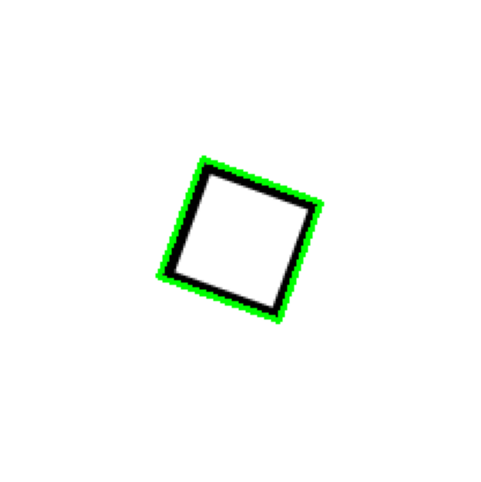

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
im = cv2.imread('/Users/ashutosh/ProjectMajor/BASIC GEOMETRY/SQUARE/sq_sd_Wo_3.png')

# Convert to grayscale and invert colors
imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imGray = cv2.bitwise_not(imGray)

# Apply binary threshold
ret, thresh = cv2.threshold(imGray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Process only the largest contour (assumed to be the main shape)
if contours:
    cnt = max(contours, key=cv2.contourArea)  # Get the largest contour

    # Get the rotated bounding box
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.intp(box)  # Convert to integer

    # Draw the rotated bounding box
    cv2.drawContours(im, [box], 0, (0, 255, 0), 2)

# Convert BGR to RGB for Matplotlib display
imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.figure(figsize=(6, 6))
plt.imshow(imRGB)
plt.axis('off')  # Hide axes
plt.show()

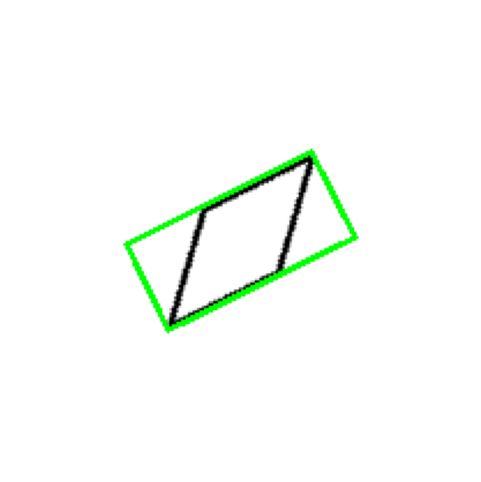

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
im = cv2.imread('/Users/ashutosh/ProjectMajor/BASIC GEOMETRY/RHOMBUS/Rhombus_8.png')

# Convert to grayscale and invert colors
imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imGray = cv2.bitwise_not(imGray)

# Apply binary threshold
ret, thresh = cv2.threshold(imGray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Process only the largest contour (assumed to be the main shape)
if contours:
    cnt = max(contours, key=cv2.contourArea)  # Get the largest contour

    # Get the rotated bounding box
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.intp(box)  # Convert to integer

    # Draw the rotated bounding box
    cv2.drawContours(im, [box], 0, (0, 255, 0), 2)

# Convert BGR to RGB for Matplotlib display
imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.figure(figsize=(6, 6))
plt.imshow(imRGB)
plt.axis('off')  # Hide axes
plt.show()